<a href="https://colab.research.google.com/github/Alfonso-Jesus-Garcia-Moya/aprendizaje_supervisado/blob/main/aprendizaje_supervisado_semana_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Bibliotecas necesarias para trabajar con aprendizaje supervisado


In [ ]:
# Conjuntos de datos de prueba que ya trae sklearn
from sklearn.datasets import load_breast_cancer
import seaborn as sns
# Modelo de Árbol de Decisión
from sklearn.tree import DecisionTreeClassifier

# Utilidad para dividir los datos en entrenamiento y prueba
from sklearn.model_selection import train_test_split

# Métricas para evaluar el modelo
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Manejo de datos en tablas (DataFrame)
import pandas as pd

# 2.1. Definición y principios básicos

El **aprendizaje supervisado** es un tipo de aprendizaje automático en el que un modelo se entrena con un conjunto de datos que contiene **entradas (features)** y **salidas esperadas (etiquetas)**.  
El objetivo es que el modelo aprenda la relación entre ambos y pueda **predecir la etiqueta correcta para nuevos datos**.

**Principios básicos:**
- Se parte de un conjunto de datos etiquetados (ej. imágenes de tumores: benigno o maligno).
- El modelo busca patrones en los datos de entrenamiento.
- Una vez entrenado, se prueba con nuevos datos para evaluar qué tan bien generaliza.



In [ ]:
# Cargar el dataset de cáncer de mama
data = load_breast_cancer()

# Ver las claves principales
print("Claves del dataset:", data.keys())

# Ver qué representa cada parte
print("\nDescripción breve:\n", data.DESCR[:400], "...")  # primeras líneas de la descripción


Claves del dataset: dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

Descripción breve:
 .. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

:Number of Instances: 569

:Number of Attributes: 30 numeric, predictive attributes and the class

:Attribute Information:
    - radius (mean of distances from center to points on the perimeter)
    - texture (standard deviation of gray-scale values) ...


# 2.2. Conjuntos de datos y etiquetas

Un **conjunto de datos** en aprendizaje supervisado está formado por:

- **Características (features):** variables numéricas o categóricas que describen a cada muestra.  
- **Etiqueta (target):** la respuesta que queremos que el modelo aprenda a predecir.

En el caso del dataset de **cáncer de mama**:
- **Características:** medidas numéricas como radio, textura, perímetro, área, suavidad, etc. (30 atributos en total).  
- **Etiqueta:** diagnóstico, donde `M = Maligno` y `B = Benigno`.

Este dataset es un ejemplo de **datos estructurados**, ya que está organizado en forma tabular (filas y columnas), similar a una hoja de cálculo.  

**Tipos de datos más comunes:**
- **Numéricos:** valores continuos (ej. área del tumor, perímetro).  
- **Categóricos:** etiquetas o clases (ej. benigno/maligno).  



In [ ]:
# Convertir el dataset a un DataFrame para ver su estructura
df = pd.DataFrame(data.data, columns=data.feature_names)

# Agregar la etiqueta (target) al DataFrame
df["Diagnosis"] = data.target

# Mostrar primeras filas
df.head()


,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,Diagnosis
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


### 📘 Uso de datasets en aprendizaje supervisado

Existen dos formas comunes de trabajar con conjuntos de datos:

1. **Datasets incluidos en bibliotecas**  
   Algunas bibliotecas como `scikit-learn` ya traen datasets de ejemplo listos para usar.  
   Ejemplo: `load_breast_cancer()` carga directamente el dataset de cáncer de mama.  

2. **Importar datos propios desde archivos CSV**  
   En la práctica real, los datos no vienen dentro de la biblioteca, sino en archivos (CSV, Excel, SQL, etc.).  
   Por eso es importante aprender a cargarlos manualmente con `pandas`.  


In [ ]:
# 2.2. Conjuntos de datos y etiquetas (versión con CSV)

# Cargar el dataset desde CSV
df = pd.read_csv("/content/cancer_dataset_full.csv")

# Mostrar primeras filas para ver la estructura
df.head()


,ID,Diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave_points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave_points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


# 2.3. Tipos de problemas en Aprendizaje Supervisado

En el aprendizaje supervisado existen dos grandes tipos de problemas:

1. **Clasificación**
   - La salida o etiqueta es **categórica** (clases).
   - Ejemplo: Diagnóstico de cáncer → "Benigno" o "Maligno".
   - Puede ser:
     - Binaria (2 clases).
     - Multiclase (más de 2 clases).

2. **Regresión**
   - La salida o etiqueta es un **valor numérico continuo**.
   - Ejemplo: Predecir el precio de una casa o la temperatura mañana.



In [ ]:
# Ver las etiquetas únicas en el dataset de cáncer
print("Etiquetas (Diagnosis):", data.target_names)

# Revisar cuántos casos hay de cada clase
df["Diagnosis"].value_counts()


Etiquetas (Diagnosis): ['malignant' 'benign']


,count
Diagnosis,
B,357
M,212


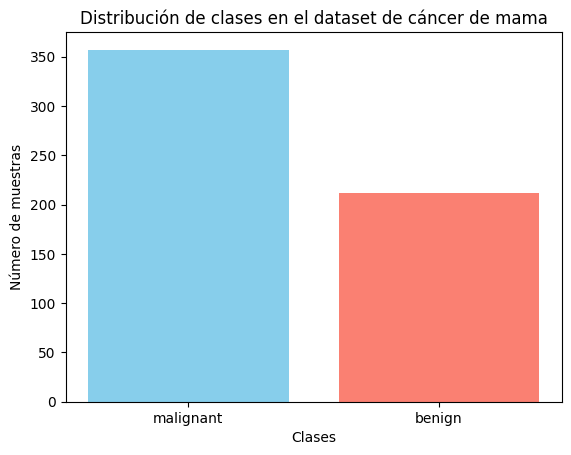

In [ ]:
import matplotlib.pyplot as plt

# Etiquetas únicas y conteo
labels = data.target_names
counts = df["Diagnosis"].value_counts()

# Crear gráfico de barras
plt.bar(labels, counts, color=["skyblue", "salmon"])
plt.title("Distribución de clases en el dataset de cáncer de mama")
plt.xlabel("Clases")
plt.ylabel("Número de muestras")
plt.show()


# 2.4. Modelos de aprendizaje supervisado

Un **modelo de aprendizaje supervisado** es un algoritmo que aprende a partir de datos de entrada (features) y sus etiquetas (target),
con el fin de realizar predicciones sobre datos nuevos.

Existen distintos tipos de modelos supervisados:

- **Árboles de decisión:** dividen los datos en reglas simples (if-else).
- **Regresión logística:** útil para problemas de clasificación binaria.
- **k-Vecinos más cercanos (KNN):** clasifica según la similitud con sus vecinos más próximos.
- **Máquinas de soporte vectorial (SVM):** buscan un hiperplano que separe las clases.
- **Redes neuronales:** modelos inspirados en el cerebro humano, capaces de aprender patrones complejos.

En este curso comenzaremos con un **Árbol de Decisión**, ya que es fácil de interpretar y mostrar.


In [ ]:
# Dividir datos en entrenamiento y prueba
X = df.drop(columns=["Diagnosis", "ID"])  # características (quitamos etiqueta e ID)
y = df["Diagnosis"]  # etiqueta

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Crear y entrenar el modelo
model = DecisionTreeClassifier(random_state=42,max_depth=4,) #CART (Classification and Regression Trees).
model.fit(X_train, y_train)

# Evaluar el modelo
y_pred = model.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nReporte de clasificación:\n", classification_report(y_test, y_pred, target_names=data.target_names))


Accuracy: 0.9473684210526315

Reporte de clasificación:
               precision    recall  f1-score   support

   malignant       0.96      0.96      0.96        71
      benign       0.93      0.93      0.93        43

    accuracy                           0.95       114
   macro avg       0.94      0.94      0.94       114
weighted avg       0.95      0.95      0.95       114



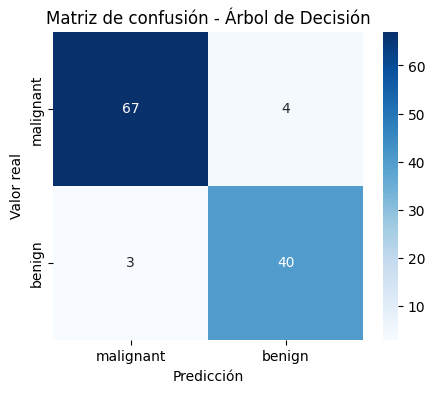

In [ ]:
cm = confusion_matrix(y_test, y_pred)

# Visualización
plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=data.target_names, yticklabels=data.target_names)
plt.xlabel("Predicción")
plt.ylabel("Valor real")
plt.title("Matriz de confusión - Árbol de Decisión")
plt.show()

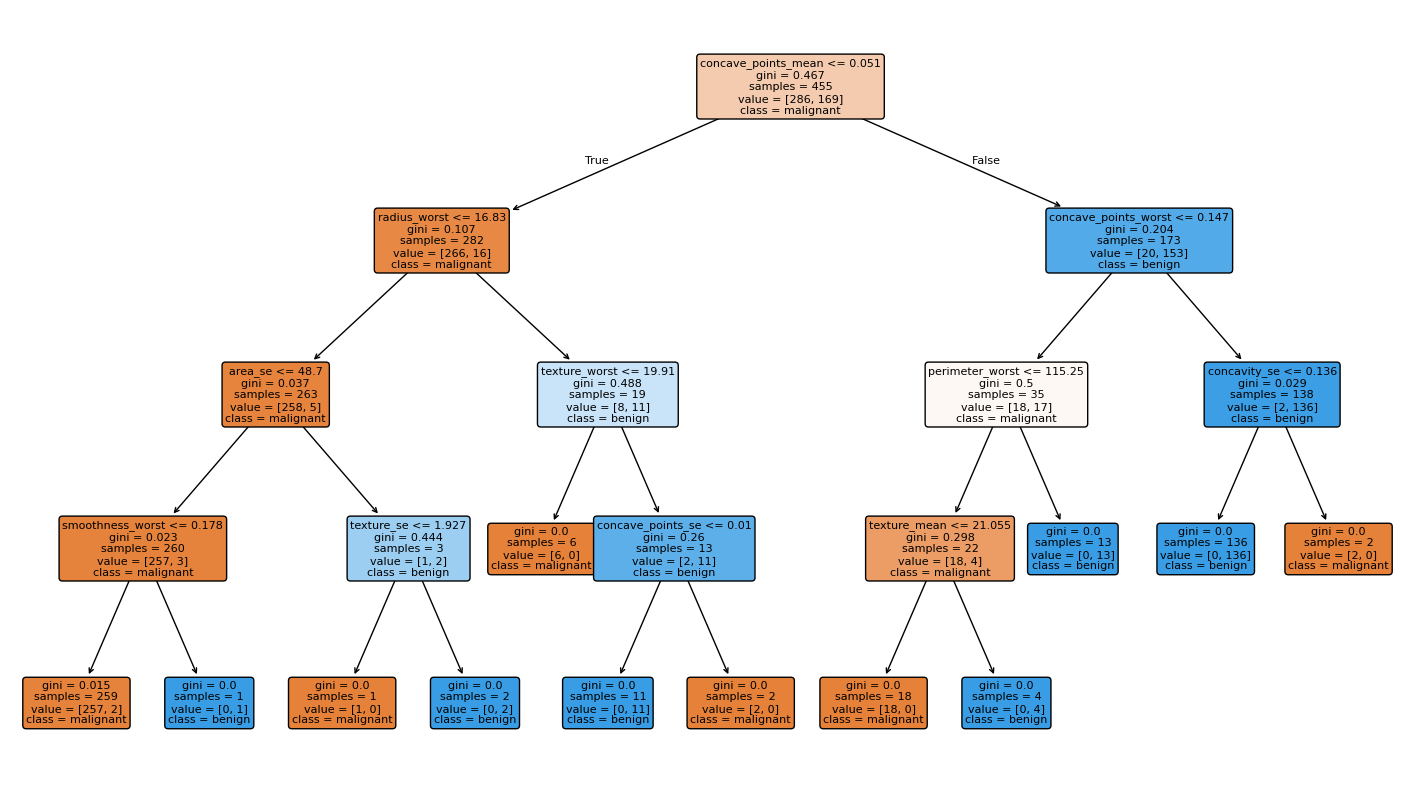

In [ ]:
from sklearn import tree
import matplotlib.pyplot as plt

# Visualizar el árbol entrenado
plt.figure(figsize=(18,10))
tree.plot_tree(
    model,
    feature_names=X.columns,
    class_names=data.target_names,
    filled=True,
    rounded=True,
    fontsize=8
)
plt.show()

# 2.4 Funciones de pérdida en Aprendizaje Supervisado

Una **función de pérdida** mide qué tan bien (o mal) está funcionando un modelo.  
Su objetivo es calcular la **diferencia entre la predicción del modelo y el valor real (etiqueta)**.

- Si la pérdida es **pequeña**, el modelo está aprendiendo correctamente.
- Si la pérdida es **grande**, el modelo necesita mejorar (ajustar parámetros, más datos, etc.).

Los algoritmos de aprendizaje buscan **minimizar esta pérdida** usando técnicas de optimización.

---

### 🔹 Ejemplos de funciones de pérdida más comunes:

- **Clasificación:**
  - *Log Loss (Entropía cruzada):* mide la diferencia entre las probabilidades predichas y las clases reales.
  - *Hinge Loss:* usada en SVM para maximizar la separación entre clases.

- **Regresión:**
  - *Error cuadrático medio (MSE):* mide la diferencia al cuadrado entre predicción y valor real.
  - *Error absoluto medio (MAE):* mide la diferencia absoluta, más robusto a valores atípicos.

---

### ⚡ Optimización

La **optimización** es el proceso de ajustar los parámetros del modelo para que la función de pérdida sea lo más pequeña posible.  
Ejemplo clásico: el **descenso de gradiente**, que ajusta parámetros paso a paso hasta reducir el error.


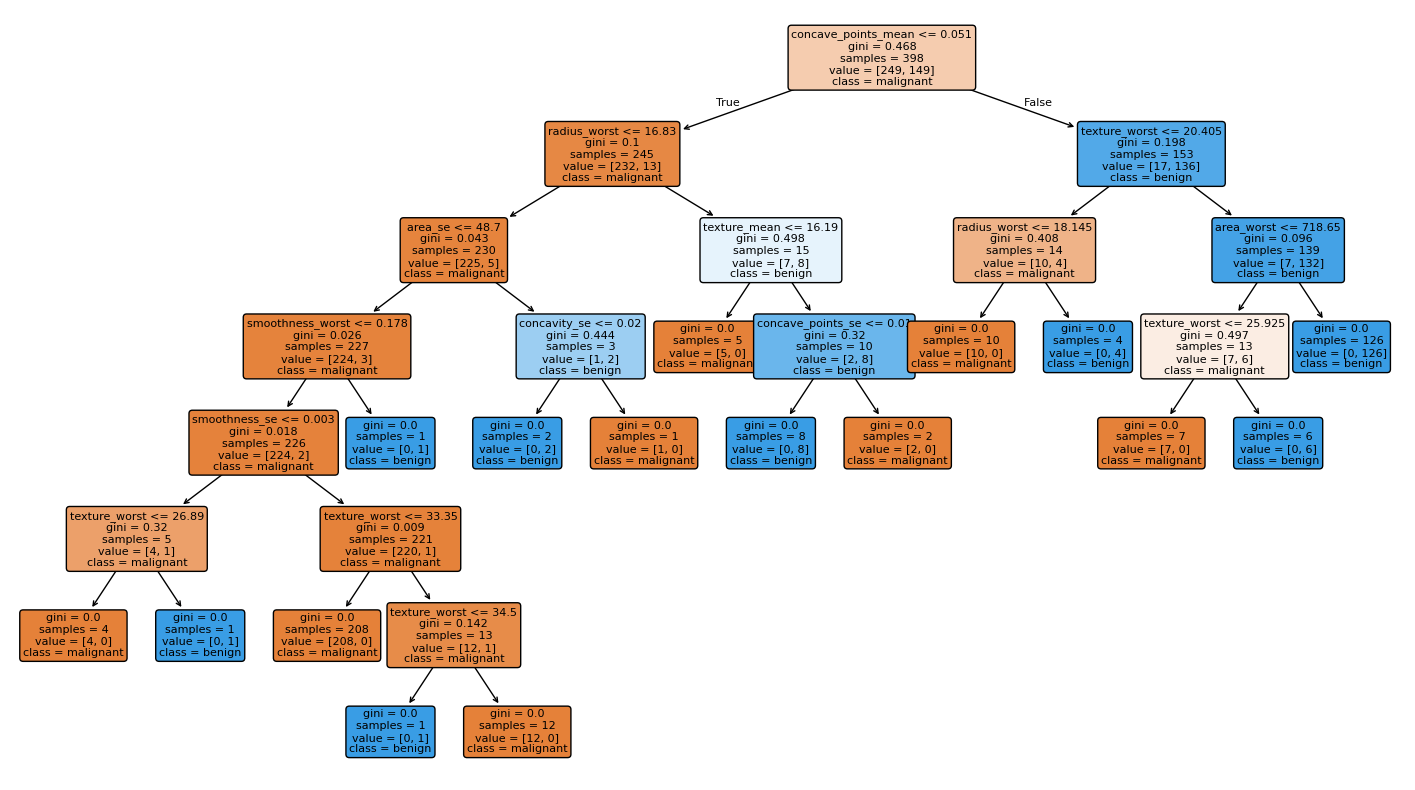

In [ ]:
from sklearn import tree
import matplotlib.pyplot as plt

# Visualizar el árbol entrenado
plt.figure(figsize=(18,10))
tree.plot_tree(
    model,
    feature_names=X.columns,
    class_names=data.target_names,
    filled=True,
    rounded=True,
    fontsize=8
)
plt.show()

En los **Árboles de Decisión**, la "función de pérdida" se utiliza en cada nodo para decidir
cómo dividir mejor los datos.  
El objetivo es lograr que las clases dentro de cada rama estén lo más "puras" posible.

Las dos medidas más comunes son:

1. **Índice de Gini**
   - Mide la probabilidad de clasificar mal un elemento elegido al azar.
   - Fórmula: Gini = 1 - Σ (pᵢ²), donde pᵢ es la proporción de cada clase en el nodo.
   - Un nodo puro (solo una clase) tiene Gini = 0.

2. **Entropía (Information Gain)**
   - Mide el desorden o incertidumbre en un nodo.
   - Fórmula: Entropía = - Σ (pᵢ * log₂(pᵢ)).
   - Un nodo puro tiene Entropía = 0.
   - Se busca la división que maximiza la "ganancia de información".

---

### 🔹 Ejemplo práctico:

- Supongamos un nodo con 10 muestras:
  - 7 benignos (B)
  - 3 malignos (M)

- **Gini:**
  Gini = 1 - [(7/10)² + (3/10)²] = 1 - (0.49 + 0.09) = 0.42

- **Entropía:**
  Entropía = -(0.7 * log₂0.7 + 0.3 * log₂0.3) ≈ 0.88

Esto indica que el nodo aún tiene **mezcla de clases** (impureza), por lo que el árbol buscará un mejor corte.




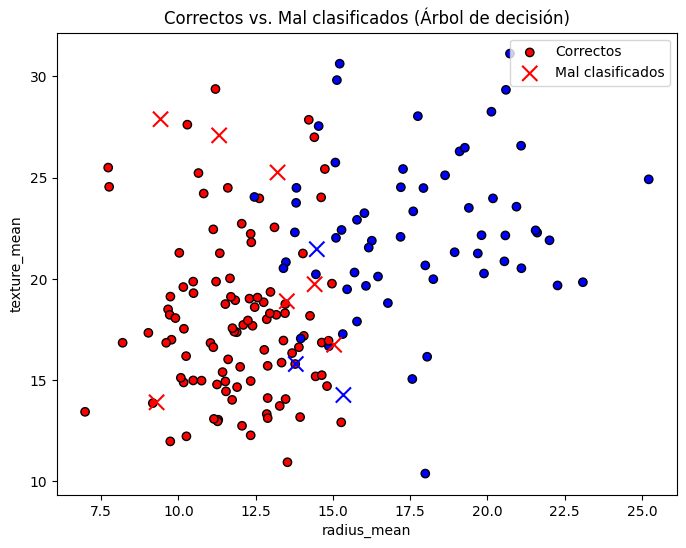

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# mapear etiquetas 'B'/'M' a 0/1 para colorear
y_true_num = np.where(y_test.values == 'M', 1, 0)

X_vis = X_test[["radius_mean", "texture_mean"]]  # usa los nombres de tu CSV

# Bien y mal clasificados
correct = (y_true_num == y_pred) if np.issubdtype(type(y_pred[0]), np.integer) else (y_test.values == y_pred)
incorrect = ~correct

# Definir colores manualmente: 0=Benigno (rojo), 1=Maligno (azul)
colors = np.array(["red", "blue"])

plt.figure(figsize=(8,6))

# Bien clasificados
plt.scatter(X_vis[correct]["radius_mean"], X_vis[correct]["texture_mean"],
            c=colors[y_true_num[correct]], marker="o", edgecolor="k", label="Correctos")

# Mal clasificados
plt.scatter(X_vis[incorrect]["radius_mean"], X_vis[incorrect]["texture_mean"],
            c=colors[y_true_num[incorrect]], marker="x", s=120, label="Mal clasificados")

plt.xlabel("radius_mean")
plt.ylabel("texture_mean")
plt.title("Correctos vs. Mal clasificados (Árbol de decisión)")
plt.legend()
plt.show()


In [ ]:
import pandas as pd
import plotly.express as px
from sklearn.datasets import load_breast_cancer
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# Cargar dataset
data = load_breast_cancer()
df = pd.DataFrame(data.data, columns=data.feature_names)
df["label"] = data.target  # 0 = malignant, 1 = benign

# Escalar datos
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df[data.feature_names])

# PCA a 3 componentes
pca = PCA(n_components=3, random_state=42)
principalComponents = pca.fit_transform(X_scaled)

# Crear DataFrame con componentes principales
principalDf = pd.DataFrame(data=principalComponents, columns=['x', 'y', 'z'])
principalDf['label'] = df['label'].map({0: "malignant", 1: "benign"})

# Gráfico 3D
fig = px.scatter_3d(principalDf, x='x', y='y', z='z', color='label')
fig.show()
